# ДЗ по "Сбор и разметка данных (семинары)"
## Семинар 8. Работа с данными
* Домашнее задание:  

- Скачайте датасет House Prices Kaggle со страницы конкурса ([ссылка на Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)) и сохраните его в том же каталоге, что и ваш скрипт или блокнот Python.  
- Загрузите датасет в pandas DataFrame под названием df.  
- Выполните предварительную обработку данных, выполнив следующие шаги:
   - Определите и обработайте отсутствующие значения в датасете. Определите, в каких столбцах есть отсутствующие значения, и решите, как их обработать (например, заполнить средним, медианой или модой, или отбросить столбцы/строки с существенными отсутствующими значениями).
   - Проверьте и обработайте любые дублирующиеся строки в датасете.
   - Проанализируйте типы данных в каждом столбце и при необходимости преобразуйте их (например, из объектных в числовые типы).  
- Проведите разведочный анализ данных (EDA), ответив на следующие вопросы:
  - Каково распределение целевой переменной 'SalePrice'? Есть ли какие-либо выбросы?   
  - Исследуйте взаимосвязи между целевой переменной и другими характеристиками. Есть ли сильные корреляции?
  - Исследуйте распределение и взаимосвязи других важных характеристик, таких как 'OverallQual', 'GrLivArea', 'GarageCars' и т.д.
  - Визуализируйте данные, используя соответствующие графики (например, гистограммы, диаграммы рассеяния, квадратные диаграммы), чтобы получить представление о датасете.
- Выполните проектирование признаков путем реализации следующих преобразований:
  - Работайте с категориальными переменными, применяя one-hot encoding или label encoding, в зависимости от характера переменной.
  - При необходимости создайте новые характеристики, такие как общая площадь или возраст объекта недвижимости, путем объединения существующих характеристик.
- Сохраните очищенный и преобразованный набор данных в новый CSV-файл под названием 'cleaned_house_prices.csv'

In [1]:
# Уствнавливаем библиотеки, если они не установлены
!pip install pandas
!pip install distfit
!pip install plotly_express==0.4.0
!pip install seaborn
!pip install -U scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 54.1 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.8.0
    Uninstalling matplotlib-3.8.0:
      Successfully uninstalled matplotlib-3.8.0


In [2]:
import pandas as pd

## Загрузка данных

### Загружаем датасет

In [7]:
df = pd.read_csv('train (1).csv')

### Посмотрим, что загрузили

In [8]:
# Укажем в настройках, чтобы отображались все столбцы
pd.set_option('display.max_columns', None)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
# Вернем настройки в первоначальное состояние
pd.reset_option('display.max_columns')

### Информация о датафрейме

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Проверка пустых значений

In [11]:
# Настроим pd, чтобы выводились все строки
pd.set_option('display.max_rows', None)
# Проверка того, в каких столбцах отсутствуют значения
print(df.isnull().sum(axis=0))
# Сбросим настройки вывода строк
pd.reset_option('display.max_rows')

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

### Проверка дубликатов

In [12]:
# Посмотрим сколько у нас дубликатов
duplicates = df.duplicated()
duplicates_df = df[duplicates]
duplicates_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


### Краткий отчет по датафрейму

In [13]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Замена пустых значений

### Поле 'LotFrontage' (Линейные футы улицы, соединенной с собственностью)

#### Посмотрим, что в поле 'LotFrontage'

In [14]:
df.groupby(['LotFrontage']).agg({'Id': ['count']})

,Id
,count
LotFrontage,
21.0,23
24.0,19
30.0,6
32.0,5
33.0,1
...,...
160.0,1
168.0,1


#### Заполним недостающие значения медианой

In [15]:
median_lot_frontage = df['LotFrontage'].median()
df['LotFrontage'] = df['LotFrontage'].fillna(median_lot_frontage)

### Поле 'Alley' (Тип подъезда к собственности)

#### Посмотрим, что в поле 'Alley'

In [16]:
df.groupby(['Alley']).agg({'Id': ['count']})

,Id
,count
Alley,
Grvl,50
Pave,41


#### Заполним недостающие значения строкой 'NA'

In [17]:
df['Alley'] = df['Alley'].fillna('NA')

### Поле 'MasVnrType' (Тип каменной облицовки)

#### Посмотрим, что в поле 'MasVnrType'

In [18]:
df.groupby(['MasVnrType']).agg({'Id': ['count']})

,Id
,count
MasVnrType,
BrkCmn,15
BrkFace,445
Stone,128


#### Заполним недостающие значения строкой 'NA'

In [19]:
df['MasVnrType'] = df['MasVnrType'].fillna('NA')

### Поле 'FireplaceQu' (Качество камина)

#### Посмотрим, что в поле 'FireplaceQu'

In [20]:
df.groupby(['FireplaceQu']).agg({'Id': ['count']})

,Id
,count
FireplaceQu,
Ex,24
Fa,33
Gd,380
Po,20
TA,313


#### Заполним недостающие значения строкой 'NA'

In [21]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('NA')

### Поле 'MasVnrArea' (Площадь каменного шпона в квадратных футах)

#### Посмотрим, что в поле 'MasVnrArea'

In [22]:
df.groupby(['MasVnrArea']).agg({'Id': ['count']})

,Id
,count
MasVnrArea,
0.0,861
1.0,2
11.0,1
14.0,1
16.0,7
...,...
1115.0,1
1129.0,1


#### Заполним недостающие значения 0

In [23]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

### Поле 'BsmtQual' (Высота подвала)

#### Посмотрим, что в поле 'BsmtQual'

In [24]:
df.groupby(['BsmtQual']).agg({'Id': ['count']})

,Id
,count
BsmtQual,
Ex,121
Fa,35
Gd,618
TA,649


#### Заполним недостающие значения строкой 'NA'

In [25]:
df['BsmtQual'] = df['BsmtQual'].fillna('NA')

### Поле 'BsmtCond' (Общее состояние подвала)

#### Посмотрим, что в поле 'BsmtCond'

In [26]:
df.groupby(['BsmtCond']).agg({'Id': ['count']})

,Id
,count
BsmtCond,
Fa,45
Gd,65
Po,2
TA,1311


#### Заполним недостающие значения строкой 'NA'

In [27]:
df['BsmtCond'] = df['BsmtCond'].fillna('NA')

### Поле 'BsmtExposure' (Стены подвала на уровне сада)

#### Посмотрим, что в поле 'BsmtExposure'

In [28]:
df.groupby(['BsmtExposure']).agg({'Id': ['count']})

,Id
,count
BsmtExposure,
Av,221
Gd,134
Mn,114
No,953


#### Заполним недостающие значения строкой 'NA'

In [29]:
df['BsmtExposure'] = df['BsmtExposure'].fillna('NA')

### Поле 'BsmtFinType1' (Качество отделки цокольного этажа)

#### Посмотрим, что в поле 'BsmtFinType1'

In [30]:
df.groupby(['BsmtFinType1']).agg({'Id': ['count']})

,Id
,count
BsmtFinType1,
ALQ,220
BLQ,148
GLQ,418
LwQ,74
Rec,133
Unf,430


#### Заполним недостающие значения строкой 'NA'

In [31]:
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('NA')

### Поле 'BsmtFinType2' (Качество второй законченной области (если присутствует))

#### Посмотрим, что в поле 'BsmtFinType2'

In [32]:
df.groupby(['BsmtFinType2']).agg({'Id': ['count']})

,Id
,count
BsmtFinType2,
ALQ,19
BLQ,33
GLQ,14
LwQ,46
Rec,54
Unf,1256


#### Заполним недостающие значения строкой 'NA'

In [33]:
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('NA')

### Поле 'Electrical' (Электрическая система)

#### Посмотрим, что в поле 'Electrical'

In [34]:
df.groupby(['Electrical']).agg({'Id': ['count']})

,Id
,count
Electrical,
FuseA,94
FuseF,27
FuseP,3
Mix,1
SBrkr,1334


#### Заполним недостающие значения наиболее распространенным значением

In [35]:
# Заполнение пропущенных значений в столбце наиболее распространенным значением
mode_embarked = df['Electrical'].mode()[0]
df['Electrical'] = df['Electrical'].fillna(mode_embarked)

### Поле 'GarageType' (Расположение гаража)

#### Посмотрим, что в поле 'GarageType'

In [36]:
df.groupby(['GarageType']).agg({'Id': ['count']})

,Id
,count
GarageType,
2Types,6
Attchd,870
Basment,19
BuiltIn,88
CarPort,9
Detchd,387


#### Заполним недостающие значения строкой 'NA'

In [37]:
df['GarageType'] = df['GarageType'].fillna('NA')

### Поле 'GarageYrBlt' (Год постройки гаража)

#### Посмотрим, что в поле 'GarageYrBlt'

In [38]:
df.groupby(['GarageYrBlt']).agg({'Id': ['count']})

,Id
,count
GarageYrBlt,
1900.0,1
1906.0,1
1908.0,1
1910.0,3
1914.0,2
...,...
2006.0,59
2007.0,49


#### Заполним недостающие значения 0

In [39]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)

### Поле 'GarageFinish' (Внутренняя отделка гаража)

#### Посмотрим, что в поле 'GarageFinish'

In [40]:
df.groupby(['GarageFinish']).agg({'Id': ['count']})

,Id
,count
GarageFinish,
Fin,352
RFn,422
Unf,605


#### Заполним недостающие значения 0

In [41]:
df['GarageFinish'] = df['GarageFinish'].fillna('NA')

### Поле 'GarageQual' (Качество гаража)

#### Посмотрим, что в поле 'GarageQual'

In [42]:
df.groupby(['GarageQual']).agg({'Id': ['count']})

,Id
,count
GarageQual,
Ex,3
Fa,48
Gd,14
Po,3
TA,1311


#### Заполним недостающие строкой 'NA'

In [43]:
df['GarageQual'] = df['GarageQual'].fillna('NA')

### Поле 'GarageCond' (Состояние гаража)

#### Посмотрим, что в поле 'GarageCond'

In [44]:
df.groupby(['GarageCond']).agg({'Id': ['count']})

,Id
,count
GarageCond,
Ex,2
Fa,35
Gd,9
Po,7
TA,1326


#### Заполним недостающие строкой 'NA'

In [45]:
df['GarageCond'] = df['GarageCond'].fillna('NA')

### Поле 'PoolQC' (Качество бассейна)

#### Посмотрим, что в поле 'PoolQC'

In [46]:
df.groupby(['PoolQC']).agg({'Id': ['count']})

,Id
,count
PoolQC,
Ex,2
Fa,2
Gd,3


#### Заполним недостающие строкой 'NA'

In [47]:
df['PoolQC'] = df['PoolQC'].fillna('NA')

### Поле 'Fence' (Качество забора)

#### Посмотрим, что в поле 'Fence'

In [48]:
df.groupby(['Fence']).agg({'Id': ['count']})

,Id
,count
Fence,
GdPrv,59
GdWo,54
MnPrv,157
MnWw,11


#### Заполним недостающие строкой 'NA'

In [49]:
df['Fence'] = df['Fence'].fillna('NA')

### Поле 'MiscFeature' (Прочая функция, не охваченная другими категориями)

#### Посмотрим, что в поле 'MiscFeature'

In [50]:
df.groupby(['MiscFeature']).agg({'Id': ['count']})

,Id
,count
MiscFeature,
Gar2,2
Othr,2
Shed,49
TenC,1


#### Заполним недостающие строкой 'NA'

In [51]:
df['MiscFeature'] = df['MiscFeature'].fillna('NA')

### Проверим пустые значения датафрейма

In [52]:
# Настроим pd, чтобы выводились все строки
pd.set_option('display.max_rows', None)
# Проверка того, в каких столбцах отсутствуют значения
print(df.isnull().sum(axis=0))
# Сбросим настройки вывода строк
pd.reset_option('display.max_rows')

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

## Разведочный анализ данных (EDA)

### Поле 'SalePrice' (цена продажи недвижимости в долларах)

#### Проверим какое у нас распределение (чтобы не забыть)

In [53]:
from distfit import distfit

In [54]:
# Сохраним оригинальные данные для визуализации, послько далее данные будут логорифмироваться избавлясь от выбросов
df_original = pd.DataFrame(df)

In [55]:
# А/B тестирование. Семинар 6. Расчёт длительности А/B теста + продвинутые топики
dfit = distfit(distr='popular')
result = dfit.fit_transform(df['SalePrice'])

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 5.45105e-11] [loc=180921.196 scale=79415.292]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 1.81978e-10] [loc=34900.000 scale=146021.196]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 3.23125e-10] [loc=34900.000 scale=0.000]
[distfit] >INFO> [dweibull  ] [0.04 sec] [RSS: 2.87788e-11] [loc=166383.808 scale=57223.063]
[distfit] >INFO> [t         ] [0.26 sec] [RSS: 5.45096e-11] [loc=180920.540 scale=79415.160]
[distfit] >INFO> [genextreme] [0.25 sec] [RSS: 3.20293e-10] [loc=34900.132 scale=1.305]
[distfit] >INFO> [gamma     ] [0.07 sec] [RSS: 2.82294e-10] [loc=-75061475.684 scale=10993.592]
[distfit] >INFO> [lognorm   ] [0.00 sec] [RSS: 1.25554e-11] [loc=-126.417 scale=166853.496]
[distfit] >INFO> [beta      ] [0.11 sec] [RSS: 2.01587e-11] [loc=24176.867 scale=2122600.504]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 2.38664e-10] [loc=34900.000 scale=720100.000]
[distfit] >INFO> [loggamma  ]

In [56]:
result['model']

{'name': 'lognorm',
 'score': 1.2555425708391397e-11,
 'loc': -126.41694789009435,
 'scale': 166853.49551208408,
 'arg': (0.39898746729025825,),
 'params': (0.39898746729025825, -126.41694789009435, 166853.49551208408),
 'model': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x7848872e97e0>,
 'bootstrap_score': 0,
 'bootstrap_pass': None,
 'color': '#e41a1c',
 'CII_min_alpha': 86433.78709389127,
 'CII_max_alpha': 321500.47005855746}

#### Посмотрим распредиление поля 'SalePrice'

Text(0, 0.5, 'Количество домов')

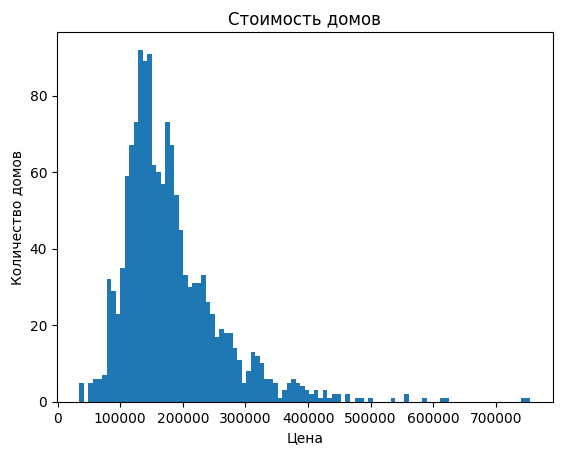

In [57]:
import matplotlib.pyplot as plt

plt.hist(df['SalePrice'], bins=100)
plt.title('Стоимость домов')
plt.xlabel('Цена')
plt.ylabel('Количество домов')

In [58]:
import plotly.express as px
# Отрисуем интерактивный график
fig = px.histogram(df['SalePrice'],
                   title='Стоимость домов',
                   marginal = 'box',
                   nbins =  100,
                   barmode='overlay',
                   labels={"value": "Цена"})

fig.show()

##### Посмотреть график в  [Jupiter nbviewer](https://nbviewer.org/github/uc20100/Data-Collection-and-Markup/blob/a9071b76b9830d4a564bb7f96ab3abbee52622c8/seminar_8/seminar_8.ipynb)

#### Проверим выбросы в поле 'SalePrice'

In [59]:
import numpy as np

# Вычисление Z-score для столбца "SalePrice"
from scipy import stats

z = np.abs(stats.zscore(df['SalePrice']))

# Установка порогового значения Z-score
threshold = 3

# Выявление выбросов на основе Z-score
outliers = df['SalePrice'][z > threshold]

In [60]:
# Среднее значение в столбце
df['SalePrice'].mean()

180921.19589041095

##### Посмотрим сколько у нас выбросов

In [61]:
outliers

,SalePrice
58,438780
178,501837
185,475000
349,437154
389,426000
440,555000
473,440000
496,430000
527,446261
591,451950


##### Снизим влияние эксипемальных значений с помощью математической функции `log`

In [62]:
# Трансформация столбца "SalePrice" с помощью логарифмической функции
df['SalePrice'] = np.log1p(df['SalePrice'])

In [63]:
df['SalePrice'].mean()

12.024057394918406

###### Получили значительное снижение среднего значения

### Поле 'OverallQual' (материал и отделка дома)

#### Посмотрим распредиление поля 'OverallQual'

Text(0, 0.5, 'Количество домов')

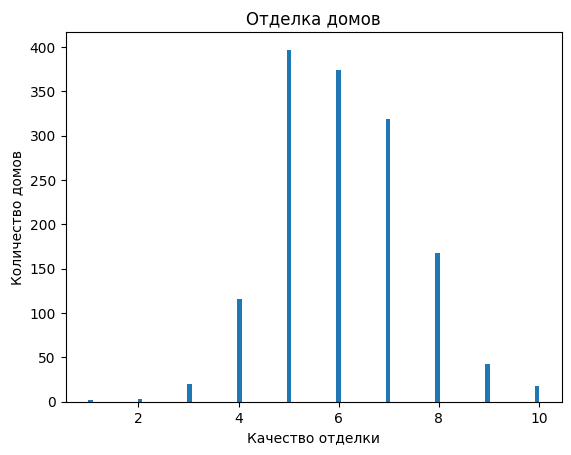

In [64]:
import matplotlib.pyplot as plt

plt.hist(df['OverallQual'], bins=100)
plt.title('Отделка домов')
plt.xlabel('Качество отделки')
plt.ylabel('Количество домов')

In [65]:
import plotly.express as px
# Отрисуем интерактивный график
fig = px.histogram(df['OverallQual'],
                   title='Отделка домов',
                   marginal = 'box',
                   nbins =  100,
                   barmode='overlay',
                   labels={"value": "Качество отделки"})

fig.show()

##### Посмотреть график в  [Jupiter nbviewer](https://nbviewer.org/github/uc20100/Data-Collection-and-Markup/blob/a9071b76b9830d4a564bb7f96ab3abbee52622c8/seminar_8/seminar_8.ipynb)

#### Проверим выбросы в поле 'OverallQual'

In [66]:
# Вычисление Z-score для столбца "OverallQual"
z = np.abs(stats.zscore(df['OverallQual']))

# Установка порогового значения Z-score
threshold = 3

# Выявление выбросов на основе Z-score
outliers = df['OverallQual'][z > threshold]

In [67]:
# Среднее значение в столбце
df['OverallQual'].mean()

6.0993150684931505

##### Посмотрим сколько у нас выбросов

In [68]:
outliers

,OverallQual
375,1
533,1


##### Снизим влияние эксипемальных значений с помощью винсоризации

In [69]:
# ВНИМАНИЕ Этот код ничего не меняет я его написал, чтобы не забыть про этот метод
# Винсоризация столбца "OverallQual"
from scipy.stats.mstats import winsorize
# С права отбросим 1% слева 1%
df['OverallQual'] = winsorize(df['OverallQual'], limits=[0.01, 0.01])

In [70]:
# Среднее значение в столбце
df['OverallQual'].mean()

6.104109589041096

##### Уберём выбросы логарифмом

In [71]:
# Трансформация столбца "SalePrice" с помощью логарифмической функции
df['OverallQual'] = np.log1p(df['OverallQual'])

In [72]:
# Среднее значение в столбце
df['OverallQual'].mean()

1.9418492579438662

###### Среднее значительно уменьшилось, выбросов не осталось

### Поле 'GrLivArea' (жилая площадь над уровнем земли (земля), квадратные футы)

#### Посмотрим распредиление поля 'GrLivArea'

Text(0, 0.5, 'Количество домов')

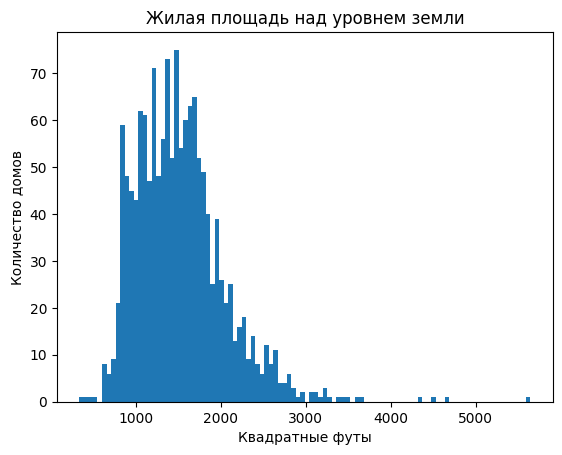

In [73]:
import matplotlib.pyplot as plt

plt.hist(df['GrLivArea'], bins=100)
plt.title('Жилая площадь над уровнем земли')
plt.xlabel('Квадратные футы')
plt.ylabel('Количество домов')

In [74]:
import plotly.express as px
# Отрисуем интерактивный график
fig = px.histogram(df['GrLivArea'],
                   title='Жилая площадь над уровнем земли',
                   marginal = 'box',
                   nbins =  100,
                   barmode='overlay',
                   labels={"value": "Квадратные футы"})

fig.show()

##### Посмотреть график в  [Jupiter nbviewer](https://nbviewer.org/github/uc20100/Data-Collection-and-Markup/blob/a9071b76b9830d4a564bb7f96ab3abbee52622c8/seminar_8/seminar_8.ipynb)

#### Проверим выбросы в поле 'GrLivArea'

In [75]:
# Вычисление Z-score для столбца "GrLivArea"
z = np.abs(stats.zscore(df['GrLivArea']))

# Установка порогового значения Z-score
threshold = 3

# Выявление выбросов на основе Z-score
outliers = df['GrLivArea'][z > threshold]

In [76]:
# Среднее значение в столбце
df['GrLivArea'].mean()

1515.463698630137

##### Посмотрим сколько у нас выбросов

In [77]:
outliers

,GrLivArea
118,3222
185,3608
197,3112
304,3493
496,3228
523,4676
608,3194
635,3395
691,4316
769,3279


##### Снизим влияние эксипемальных значений с помощью логорифмической функции

In [78]:
# Трансформация столбца "Fare" с помощью логарифмической функции
df['GrLivArea'] = np.log1p(df['GrLivArea'])

In [79]:
# Среднее значение в столбце
df['GrLivArea'].mean()

7.268511760585581

###### Среднее снизилось значительно

### Поле 'GarageCars' (размер гаража по вместимости автомобиля)

#### Посмотрим распредиление поля 'GarageCars'

Text(0, 0.5, 'Количество домов')

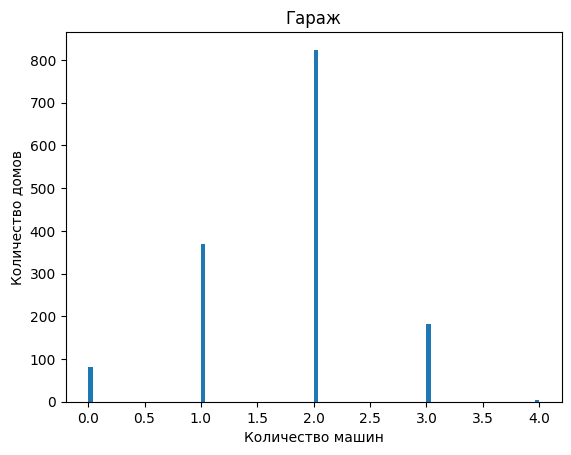

In [80]:
import matplotlib.pyplot as plt

plt.hist(df['GarageCars'], bins=100)
plt.title('Гараж')
plt.xlabel('Количество машин')
plt.ylabel('Количество домов')

In [81]:
import plotly.express as px
# Отрисуем интерактивный график
fig = px.histogram(df['GarageCars'],
                   title='Гараж',
                   marginal = 'box',
                   nbins =  100,
                   barmode='overlay',
                   labels={"value": "Количество машин"})

fig.show()

##### Посмотреть график в  [Jupiter nbviewer](https://nbviewer.org/github/uc20100/Data-Collection-and-Markup/blob/a9071b76b9830d4a564bb7f96ab3abbee52622c8/seminar_8/seminar_8.ipynb)

#### Проверим выбросы в поле 'GarageCars'

In [82]:
# Вычисление Z-score для столбца "GarageCars"
z = np.abs(stats.zscore(df['GarageCars']))

# Установка порогового значения Z-score
threshold = 3

# Выявление выбросов на основе Z-score
outliers = df['GarageCars'][z > threshold]

In [83]:
# Среднее значение в столбце
df['GarageCars'].mean()

1.7671232876712328

##### Посмотрим сколько у нас выбросов

In [84]:
outliers

,GarageCars


###### Всё нормально выбросов нет, ничего делать не надо

### Визуализируем данные

In [85]:
import seaborn as sns

#### Стоимость жилья в зависимости от квадратных метров

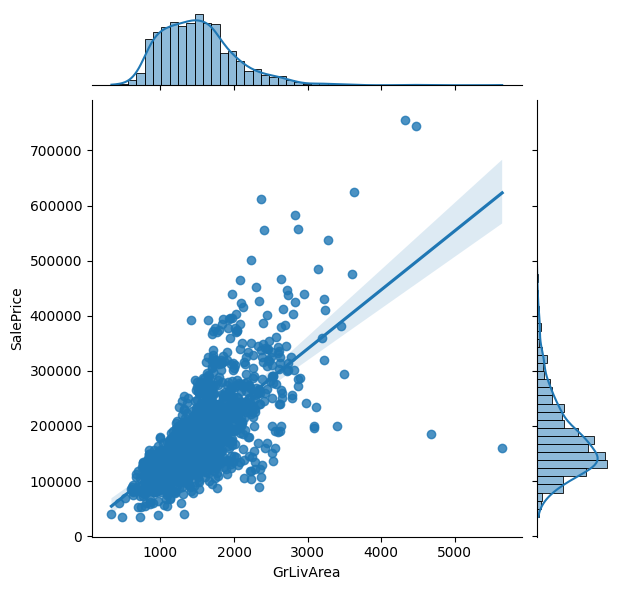

In [86]:
sns.jointplot(x=df_original['GrLivArea'], y=df_original['SalePrice'], kind='reg');

##### Вывод: график показывает совместное распределение цены и жилых квадратных метров, то есть визуально можно увидеть зависимость, как увеличивается цена дома с увеличением жилых метров.

#### Стоимость жилья в зависимости от отделки

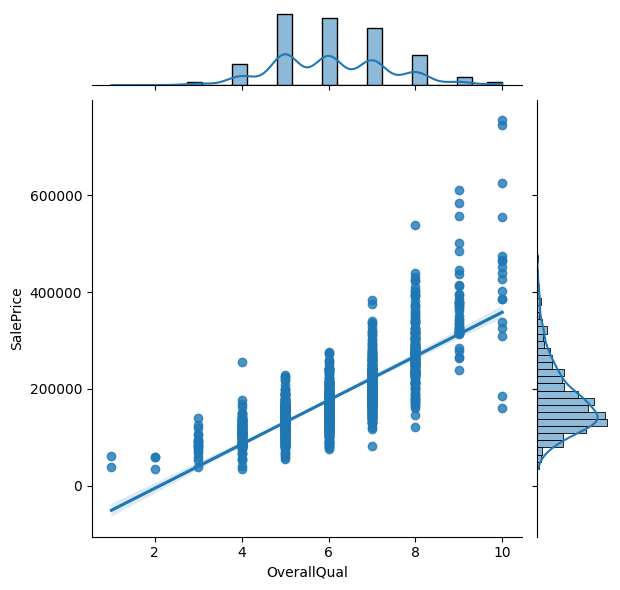

In [87]:
sns.jointplot(x=df_original['OverallQual'], y=df_original['SalePrice'], kind='reg');

##### Вывод: график показывает совместное распределение цены и качества дома, то есть визуально можно увидеть, как зависит цена от качества отделки дома. С увеличением качества дома, цена увеличивается.

#### График корреляции

In [88]:
corr_matrix = df_original[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars']].corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix)<0.3] = 0
corr_matrix

,SalePrice,OverallQual,GrLivArea,GarageCars
SalePrice,1.0,0.8,0.7,0.6
OverallQual,0.8,1.0,0.6,0.6
GrLivArea,0.7,0.6,1.0,0.5
GarageCars,0.6,0.6,0.5,1.0


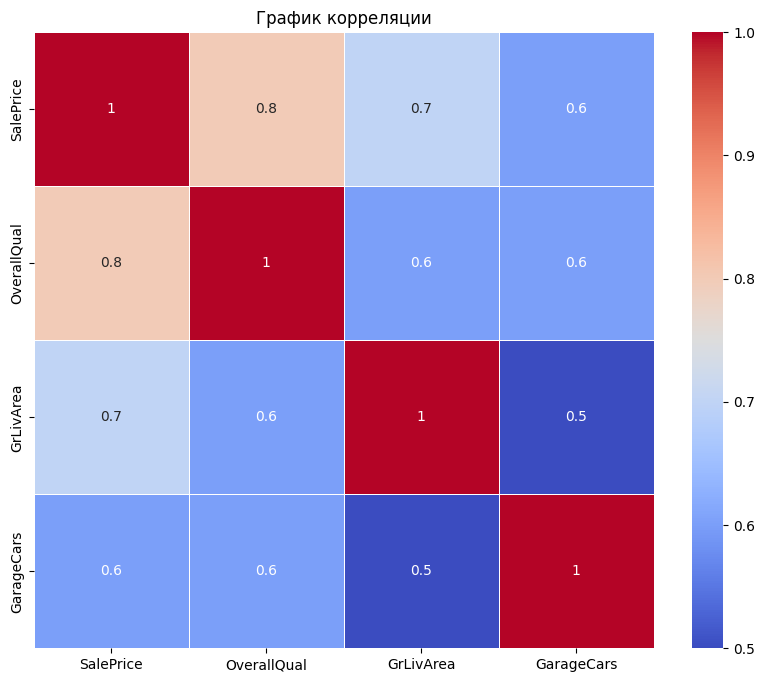

In [89]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, cmap='coolwarm')
plt.title('График корреляции');

##### Вывод: график показывает величину корреляции между значениями. Например корреляция между SalePrice и OverallQual составляет 0.8 – это высокая корреляция и означает что с повышением цены дома увеличивается и качество отделки. Корреляция бывает: 0.1-0.3 слабая, 0.3-0.5 умеренная, 0.5-0.7 заметная, 0.7-0.9 высокая, 0.9-1.0 весьма высокая.

#### Ящик с усами

[distfit] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[distfit] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


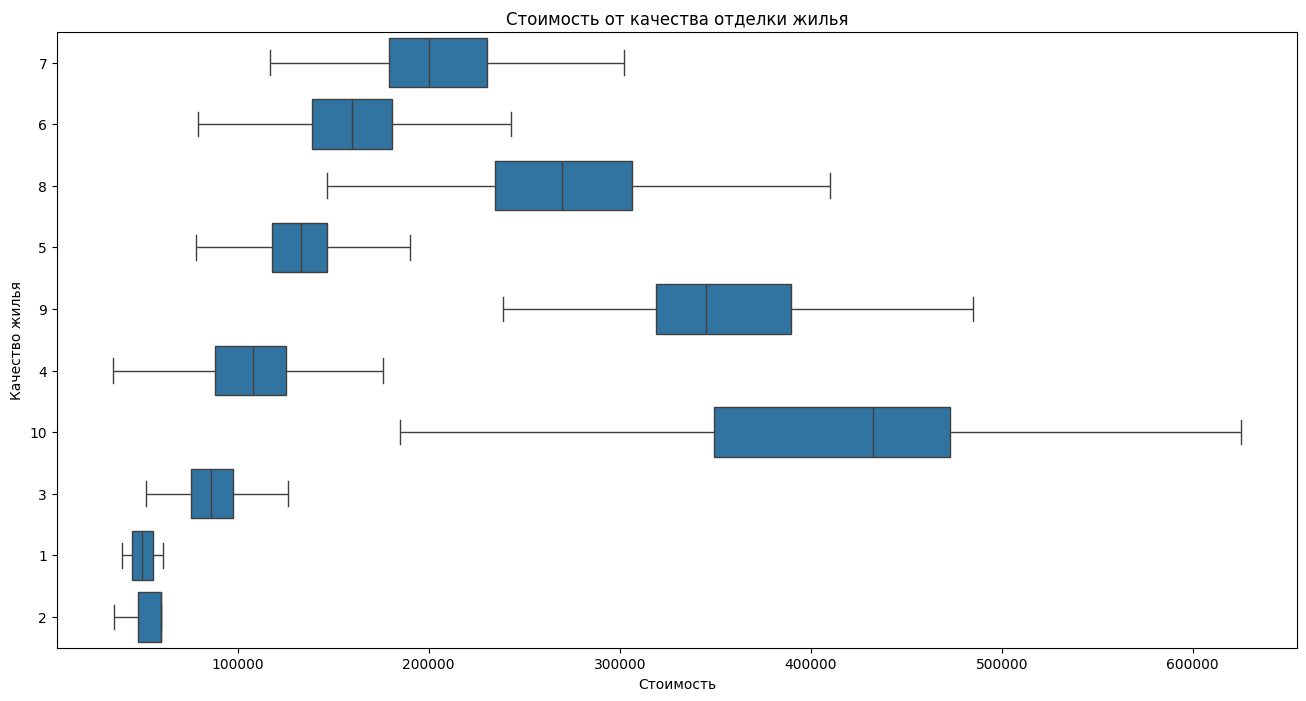

In [90]:
plt.figure(figsize=(16,8))
sns.boxplot(x=df_original['SalePrice'], y=df_original['OverallQual'].astype('str'), showfliers=False)
plt.xlabel('Стоимость')
plt.ylabel('Качество жилья')
plt.title('Стоимость от качества отделки жилья');

##### Вывод: на данной диаграмме можно увидеть ящики с усами, какой ценовой диапазон у домов, медиана, максимальная и минимальная цена в зависимости от качества жилья. Выбросы отфильтровываются.

## Проектирование признаков

In [91]:
from sklearn.preprocessing import LabelEncoder

### Заменим все строковые значения полей, числовыми значениями, для машинного обучения

In [92]:
le = LabelEncoder()
# Пробежимся по столбцам датафрейма и преобразуем буквеное обозначение в цифровое
for name, _ in df.items():
    if df[name].dtype == 'object':
        df[name] = le.fit_transform(df[name].astype(str))

In [93]:
# Посмотрим, инфу о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int64  
 6   Alley          1460 non-null   int64  
 7   LotShape       1460 non-null   int64  
 8   LandContour    1460 non-null   int64  
 9   Utilities      1460 non-null   int64  
 10  LotConfig      1460 non-null   int64  
 11  LandSlope      1460 non-null   int64  
 12  Neighborhood   1460 non-null   int64  
 13  Condition1     1460 non-null   int64  
 14  Condition2     1460 non-null   int64  
 15  BldgType       1460 non-null   int64  
 16  HouseStyle     1460 non-null   int64  
 17  OverallQual    1460 non-null   float64
 18  OverallC

## Сохранение обработанных данных

In [94]:
df.to_csv('cleaned_house_prices.csv', encoding='utf-8')

In [95]:
import sys
print(sys.version)

3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]


## Вывод:
### Заполнил недостающие данные в таблице, убрал выбросы, преобразовал буквенное обозначение в цифровое, подготовив датафрейм для машинного обучения, сохранил данные в CSV файл.

### Дополнительные материалы: [лекция](https://gbcdn.mrgcdn.ru/uploads/record/286014/attachment/732da16c631bd1b5b4e6778ec09694eb.mp4), [конспект](https://gbcdn.mrgcdn.ru/uploads/asset/5621472/attachment/92a01aa00756c2b7bdcc99215bf43db6.pdf), [презентация](https://gbcdn.mrgcdn.ru/uploads/asset/5621470/attachment/1485a98abf3547bcfe37d1912778f980.pdf), [Jupiter nbviewer](https://www.youtube.com/watch?v=nFvOLHzOik8)